# Homework 6
## ECE 204 Data Science & Engineering

*Warning: this notebook reuses certain variable names, which can cause conflict. They're found in multiple questions. If you have any difficulty, please restart your kernel in the menu above.*

## K-Nearest Neighbors

Following are few questions that deal with the Wisconsin Breast Cancer dataset `"breast-cancer-wisconsin.csv"`. The fun fact about this data is that it originates from the University of Wisconsin itself! If you are interested, you can read more about it here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) <br>

The 30 features in this data describe certain characteristics of a cell nuclei that can be used to predict whether a tumor is `Malignant` or `Benign`. We will employ the KNN algorithm to do this classification/diagnosis.

The `diagnosis` column in this data contains the "label" information for training where the labels `0 = "Benign"` and `1 = "Malignant"`. The other columns represent the various features. You can find detailed attribute information regarding what each feature means at the link above. 

---
**Problem 1.**
We have 30 features in this dataset. As it often turns out, some features are more important than others in a given scenario. Our ultimate objective is to classify whether a tumor is malignant or benign based on a certain set of features in a data point. This data is encoded in the `diagnosis` column as 1 and 0 respectively.

Plot the following feature columns against each other. **Which pair of features represent the most clear separation of classes among the pairs given below?**

1. area_mean vs concavity_mean
2. fractal_dimension_mean vs symmetry_mean
3. smoothness_mean vs texture_mean
4. texture_mean vs fractal_dimension_mean

`Hint:` While plotting, remember that you can use `dfbc.plot.scatter(..., c=column_name, cmap='viridis')`. This will show `column_name` in different colors based on value. Using different colors for different classes will help you visualize the separation.

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

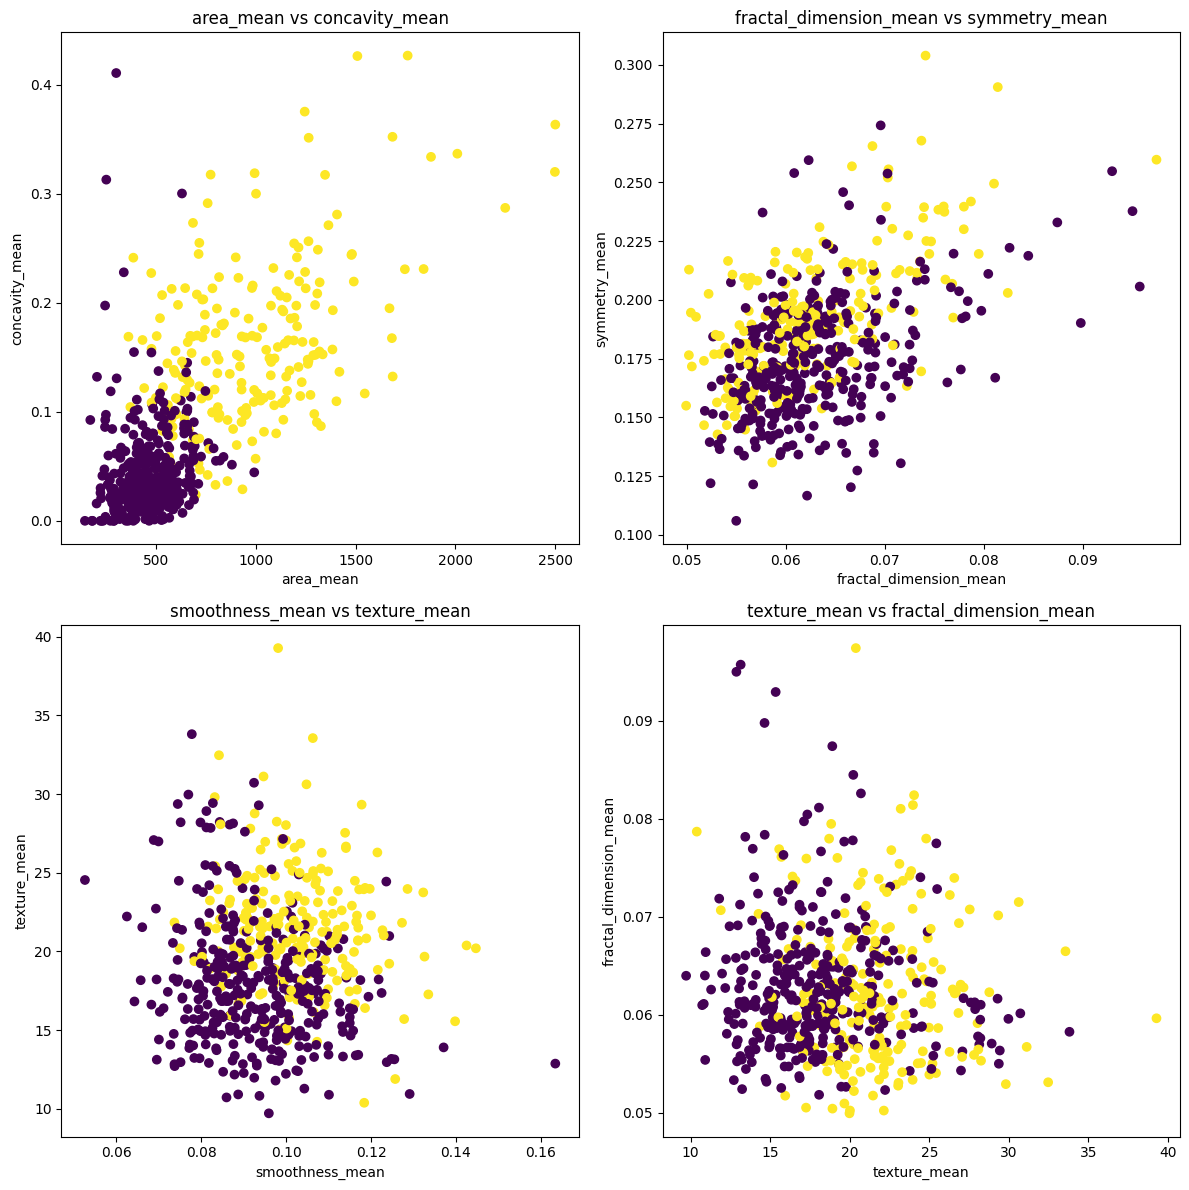

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from the CSV file
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")

# Print the first few rows to check if the data is loaded correctly
print(dfbc.head())

# Check for correct column names and data types
print(dfbc.dtypes)

# Convert 'diagnosis' column to numeric if necessary
if dfbc['diagnosis'].dtype == 'object':
    dfbc['diagnosis'] = dfbc['diagnosis'].map({'M': 1, 'B': 0})

# Check for NaN values in the dataset
print(dfbc.isna().sum())

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Example plot: area_mean vs concavity_mean
axs[0, 0].scatter(dfbc['area_mean'], dfbc['concavity_mean'], c=dfbc['diagnosis'], cmap='viridis')
axs[0, 0].set_title('area_mean vs concavity_mean')
axs[0, 0].set_xlabel('area_mean')
axs[0, 0].set_ylabel('concavity_mean')

axs[0, 1].scatter(dfbc['fractal_dimension_mean'], dfbc['symmetry_mean'], c=dfbc['diagnosis'], cmap='viridis')
axs[0, 1].set_title('fractal_dimension_mean vs symmetry_mean')
axs[0, 1].set_xlabel('fractal_dimension_mean')
axs[0, 1].set_ylabel('symmetry_mean')

# Plot 3: smoothness_mean vs texture_mean
axs[1, 0].scatter(dfbc['smoothness_mean'], dfbc['texture_mean'], c=dfbc['diagnosis'], cmap='viridis')
axs[1, 0].set_title('smoothness_mean vs texture_mean')
axs[1, 0].set_xlabel('smoothness_mean')
axs[1, 0].set_ylabel('texture_mean')

# Plot 4: texture_mean vs fractal_dimension_mean
axs[1, 1].scatter(dfbc['texture_mean'], dfbc['fractal_dimension_mean'], c=dfbc['diagnosis'], cmap='viridis')
axs[1, 1].set_title('texture_mean vs fractal_dimension_mean')
axs[1, 1].set_xlabel('texture_mean')
axs[1, 1].set_ylabel('fractal_dimension_mean')


# Add other plots as needed

plt.tight_layout()
plt.show()


---
**Problem 2.**
In the Wisconsin-Breast-Cancer dataset from last question, train a KNN model with $K = 11$ on provided preprocessed dataset described below. **What is the accuracy of this model?**

As a preprocessing step, you have been given code that does the following:

- splits the dataset into a train/test set. It uses 70% of the dataset for training, and 30% for testing.
- normalizes the features. It scales each feature so the mean is 0 and the standard deviation is 1.

In [16]:
## Code given for convenience
# First, a bunch of imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reading data
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")

# Defining features and labels
Y = dfbc.iloc[:, 0]  # the first column is the label
X = dfbc.iloc[:, 1:]  # the other columns are the features

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Normalize the dataset
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

# Training the KNN model with K=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_normalized, Y_train)

# Making predictions on the test set
Y_pred = knn.predict(X_test_normalized)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
accuracy_percentage = accuracy * 100
accuracy_percentage

95.90643274853801

---
**Problem 3.**
Let's try to find the best value of K for the example in the previous question. You have already been given preprocessing steps for splitting and normalizing the data. Fit the KNN on the normalized training, and then measure the accuracy on the normalized testing data. Do this for all values of K from 1 to 20. **What value of K in the range 1-20 yields the highest accuracy score for the normalized test set?**

*Hint:* Run the classifier model fitting and predicting in a loop for each value of K from 1 to 20, saving the value of accuracy at each iteration in a list or a dictionary.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reading data
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")

# Splitting the dataset
X = dfbc.iloc[:, 1:]
Y = dfbc.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Normalize the dataset
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

# Dictionary to store the accuracy for each K
k_accuracy = {}

# Looping through values of K from 1 to 20
for k in range(1, 21):
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(X_train_normalized, Y_train)
    # Predict on the test set
    Y_pred = knn.predict(X_test_normalized)
    # Calculate and store the accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    k_accuracy[k] = accuracy

# Finding the value of K with the highest accuracy
best_k = max(k_accuracy, key=k_accuracy.get)
best_accuracy = k_accuracy[best_k]

best_k, best_accuracy


(9, 0.9649122807017544)

## Decision Trees

The next set of two questions will focus on the data in `airports.csv`. The dataset lists over 3,000 airports in the US, including the state they're located in, the latitude, and the longitude. These questions will ask you to train a decision tree classifier from string labels in the prediction variables. Scikit-Learn supports using string arrays as prediction variables, at least when doing classification.

---
**Problem 4.**
Train a decision tree classifier on the `airports.csv` dataset to predict the state from the latitude and longitude of each airport. **What's the importance of `latitude` as reported by the Scikit-Learn decision tree object?** If the feature importance for `latitude` is high, state boundaries tend to run east-west instead of north-south.

When creating the decision tree classifer, use `random_state=0` and `max_depth=4`. 
Round your answer to 2 digits (e.g., 0.29 for 0.29132). 

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("airports.csv")

# Create feature matrix (X) and target variable (y)
X = df[['latitude', 'longitude']]
y = df['state']

# Initialize the DecisionTreeClassifier with random_state=0 and max_depth=4
clf = DecisionTreeClassifier(random_state=0, max_depth=4)

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Find the importance of latitude
latitude_importance = feature_importances[X.columns.get_loc('latitude')]

# Round the importance to 2 digits
rounded_latitude_importance = round(latitude_importance, 2)

# Print the importance of latitude
print("Importance of latitude:", rounded_latitude_importance)


Importance of latitude: 0.63


---
**Problem 5.**
Using the data in `airports.csv`, train a decision tree to predict the state from the `latitude` and `longitude`. When creating the decision tree classifier, use `max_depth=4` and `random_state=0`.

**What state does the decision predict for the point  predict for** [latitude, longitude] = [43.2397, -75.1578]? 

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("airports.csv")

# Create feature matrix (X) and target variable (y)
X = df[['latitude', 'longitude']]
y = df['state']

# Initialize the DecisionTreeClassifier with max_depth=4 and random_state=0
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Define the latitude and longitude for the point to predict
latitude = 43.2397
longitude = -75.1578

# Predict the state for the given latitude and longitude
predicted_state = clf.predict([[latitude, longitude]])

# Print the predicted state
print("Predicted State:", predicted_state[0])


Predicted State: OH


C:\Users\16089\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---
**Problem 6.**
Read in `banknote_train.csv` and `banknote_test.csv` datasets. The data has 4 feature columns, and one target/label column. The target column is "1" if the banknote is forged, and "0" if it's authentic.

Build a decision tree classifier with `random_state=0` and `max_depth=1`. This is the simplest estimator; it's only making a single binary chioce. Using this estimator, predict the labels for the data in test file after training on the data in the train file.

**What is the accuracy of the trained decision classifier on the test data?** 

`Note`: In Canvas, enter your answer as a percent between 0 and 100, rounded to two decimal places.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Read in the train and test datasets
df_train = pd.read_csv("banknote_train.csv")
df_test = pd.read_csv("banknote_test.csv")

# Separate the features and target variables for both train and test sets
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# Initialize the DecisionTreeClassifier with max_depth=1 and random_state=0
clf = DecisionTreeClassifier(max_depth=1, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the trained decision tree classifier
accuracy = accuracy_score(y_test, y_pred)

# Convert accuracy to a percentage rounded to two decimal places
accuracy_percent = round(accuracy * 100, 2)

# Print the accuracy
print("Accuracy on the test data:", accuracy_percent, "%")


Accuracy on the test data: 87.5 %


---
**Problem 7.**
**The number of examples given to an estimator affects how well it performs.** To investigate this, let's increase the number of examples (or rows in the dataframe) the estimator gets for training, and evaluate accuracy on a test set for each estimator.

Read the `banknote_train.csv` and `banknote_test.csv` datasets. Train 4 different decision tree classifiers with the following training dataset:

1. Training dataset: up to row index 200, inclusive
2. Training dataset: up to row index 400, inclusive
3. Training dataset: up to row index 900, inclusive
4. Training dataset: up to row index 1100, inclusive

These datasets are given in some example code.

**Compute the accuracy on testing data from these 4 models. In Canvas, select all the true statements.** Specify `random_state=0` when creating the decision tree classifier, and let `max_depth` be the default value (meaning you don't need to specify it).

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Read the training and testing datasets
df_train = pd.read_csv("banknote_train.csv")
df_test = pd.read_csv("banknote_test.csv")

# Define different training datasets with varying sizes
train_datasets = [
    df_train.iloc[0:200 + 1],
    df_train.iloc[0:400 + 1],
    df_train.iloc[0:900 + 1],
    df_train.iloc[0:1100 + 1]
]

# Initialize a list to store accuracy scores
accuracy_scores = []

# Iterate over the training datasets
for train_data in train_datasets:
    # Separate the features and target variable
    X_train = train_data.drop(columns=['label'])
    y_train = train_data['label']

    # Initialize the DecisionTreeClassifier with random_state=0
    clf = DecisionTreeClassifier(random_state=0)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = clf.predict(df_test.drop(columns=['label']))

    # Calculate the accuracy and append it to the accuracy_scores list
    accuracy = accuracy_score(df_test['label'], y_pred)
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each training dataset size
for i, accuracy in enumerate(accuracy_scores):
    print(f"Accuracy with size {len(train_datasets[i])}: {accuracy * 100:.2f}%")


Accuracy with size 201: 95.22%
Accuracy with size 401: 97.43%
Accuracy with size 901: 98.90%
Accuracy with size 1100: 99.63%
